In [370]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [16]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '231101_1746_2kPa_9V_3line_Data'
dataname = data+'_B9'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:40]
SensorData1 = SD1

In [17]:
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx46,Sx47,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r
count,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,...,105068.00000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000
mean,64.153068,58.383216,56.592652,58.849990,47.075239,55.527606,53.174203,57.915401,66.442514,59.611987,...,47.02979,47.105347,51.671102,55.182522,63.405932,64.152909,86.245983,79.989340,170.062055,3.200008
std,1.790837,2.118030,1.984953,1.792566,1.489814,2.223840,1.695300,1.862055,1.635785,1.605414,...,1.37115,1.420986,1.887855,1.535322,1.653394,1.790673,47.054461,48.446286,103.747112,1.599907
min,49.800000,44.800000,47.300000,50.100000,39.300000,41.300000,45.200000,48.000000,54.200000,45.900000,...,40.90000,40.300000,40.700000,42.600000,47.900000,49.800000,-455.760000,0.000000,0.000000,0.800000
25%,63.200000,57.400000,55.300000,57.700000,46.100000,54.500000,52.200000,56.800000,65.400000,59.000000,...,46.10000,46.200000,50.500000,54.300000,62.500000,63.200000,47.970000,40.000000,80.000000,1.600000
50%,64.300000,58.500000,56.600000,58.900000,47.100000,55.800000,53.300000,58.100000,66.500000,59.800000,...,47.00000,47.200000,51.700000,55.300000,63.500000,64.300000,83.670000,80.000000,180.000000,3.200000
75%,65.300000,59.700000,57.900000,60.000000,48.100000,56.900000,54.300000,59.100000,67.500000,60.500000,...,47.90000,48.100000,53.000000,56.200000,64.400000,65.300000,119.940000,120.000000,260.000000,4.800000
max,70.000000,64.600000,64.600000,65.400000,54.000000,63.100000,59.100000,64.300000,73.500000,64.100000,...,53.20000,53.400000,59.000000,60.300000,69.600000,70.000000,215.510000,160.000000,340.000000,5.600000


In [18]:
SDreal = SD1

In [19]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx46,Sx47,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r
count,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,...,105068.00000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000,105068.000000
mean,64.153068,58.383216,56.592652,58.849990,47.075239,55.527606,53.174203,57.915401,66.442514,59.611987,...,47.02979,47.105347,51.671102,55.182522,63.405932,64.152909,86.245983,79.989340,170.062055,3.200008
std,1.790837,2.118030,1.984953,1.792566,1.489814,2.223840,1.695300,1.862055,1.635785,1.605414,...,1.37115,1.420986,1.887855,1.535322,1.653394,1.790673,47.054461,48.446286,103.747112,1.599907
min,49.800000,44.800000,47.300000,50.100000,39.300000,41.300000,45.200000,48.000000,54.200000,45.900000,...,40.90000,40.300000,40.700000,42.600000,47.900000,49.800000,-455.760000,0.000000,0.000000,0.800000
25%,63.200000,57.400000,55.300000,57.700000,46.100000,54.500000,52.200000,56.800000,65.400000,59.000000,...,46.10000,46.200000,50.500000,54.300000,62.500000,63.200000,47.970000,40.000000,80.000000,1.600000
50%,64.300000,58.500000,56.600000,58.900000,47.100000,55.800000,53.300000,58.100000,66.500000,59.800000,...,47.00000,47.200000,51.700000,55.300000,63.500000,64.300000,83.670000,80.000000,180.000000,3.200000
75%,65.300000,59.700000,57.900000,60.000000,48.100000,56.900000,54.300000,59.100000,67.500000,60.500000,...,47.90000,48.100000,53.000000,56.200000,64.400000,65.300000,119.940000,120.000000,260.000000,4.800000
max,70.000000,64.600000,64.600000,65.400000,54.000000,63.100000,59.100000,64.300000,73.500000,64.100000,...,53.20000,53.400000,59.000000,60.300000,69.600000,70.000000,215.510000,160.000000,340.000000,5.600000


In [20]:
# SDreal 값이 999이거나 100이상인 이상치 제거
SDreal = SDreal[~(SDreal == 999).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
cols_to_exclude = ["Force", "theta", "z", "r"]
cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal <= 0) & (SDreal.columns == "Force")).any(axis=1)]
SDreal['Force'] -= min(SDreal['Force'])
SDreal = SDreal[SDreal["r"] >= 0.8*1]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r,cos,sin
count,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,...,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000,105058.000000
mean,64.153083,58.383241,56.592602,58.849938,47.075214,55.527599,53.174200,57.915396,66.442557,59.611933,...,51.671103,55.182510,63.405920,64.152920,74.287574,79.988578,170.064155,3.199931,-0.000313,-0.000213
std,1.790852,2.117976,1.984915,1.792537,1.489747,2.223895,1.695209,1.862125,1.635760,1.605449,...,1.887872,1.535371,1.653409,1.790689,46.758608,48.446013,103.745544,1.599899,0.707064,0.707156
min,49.800000,44.800000,47.300000,50.100000,39.300000,41.300000,45.200000,48.000000,54.200000,45.900000,...,40.700000,42.600000,47.900000,49.800000,0.000000,0.000000,0.000000,0.800000,-1.000000,-0.984808
25%,63.200000,57.400000,55.300000,57.700000,46.100000,54.500000,52.200000,56.800000,65.400000,59.000000,...,50.500000,54.300000,62.500000,63.200000,35.970000,40.000000,80.000000,1.600000,-0.766044,-0.642788
50%,64.300000,58.500000,56.600000,58.900000,47.100000,55.800000,53.300000,58.100000,66.500000,59.800000,...,51.700000,55.300000,63.500000,64.300000,71.670000,80.000000,180.000000,3.200000,-0.173648,0.000000
75%,65.300000,59.700000,57.900000,60.000000,48.100000,56.900000,54.300000,59.100000,67.500000,60.500000,...,53.000000,56.200000,64.400000,65.300000,107.937500,120.000000,260.000000,4.800000,0.766044,0.642788
max,70.000000,64.600000,64.600000,65.400000,54.000000,63.100000,59.100000,64.300000,73.500000,64.100000,...,59.000000,60.300000,69.600000,70.000000,203.500000,160.000000,340.000000,5.600000,1.000000,0.984808


In [21]:
NUMSEN = 36
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :NUMSEN].mean().values
std_values = SDreal.iloc[:, :NUMSEN].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

print("Xmean = {", ", ".join(map(str, mean_values)), "}")
print("Xstd = {", ", ".join(map(str, std_values)), "}")



min_max_F = [round(SDreal.iloc[:, NUMSEN].min(), 2), round(SDreal.iloc[:, NUMSEN].max(), 2)]
min_max_Z = [round(SDreal.iloc[:, NUMSEN+1].min(), 2), round(SDreal.iloc[:, NUMSEN+1].max(), 2)]

print("Fminmax={", ", ".join(map(str, min_max_F)), "}")

print("Zminmax={", ", ".join(map(str, min_max_Z)), "}")

Xmean = { 64.15, 58.38, 56.59, 58.85, 47.08, 55.53, 53.17, 57.92, 66.44, 59.61, 65.32, 58.22, 57.15, 48.04, 54.9, 52.62, 48.94, 41.7, 47.9, 55.54, 52.87, 56.68, 63.02, 53.85, 62.82, 62.99, 64.56, 54.34, 60.22, 48.01, 47.03, 47.11, 51.67, 55.18, 63.41, 64.15 }
Xstd = { 1.79, 2.12, 1.98, 1.79, 1.49, 2.22, 1.7, 1.86, 1.64, 1.61, 1.73, 1.79, 1.69, 1.84, 2.06, 1.69, 2.07, 1.92, 1.5, 1.54, 1.61, 1.71, 1.52, 1.76, 1.68, 1.98, 1.91, 1.6, 1.51, 1.34, 1.37, 1.42, 1.89, 1.54, 1.65, 1.79 }
Fminmax={ 0.0, 203.5 }
Zminmax={ 0, 160 }


In [22]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r,cos,sin
0,67.3,60.5,60.0,59.6,46.2,54.2,54.4,59.7,65.2,60.9,...,54.8,54.8,65.0,67.4,-0.954398,-1.0,0,-1.0,1.000000,0.00000
1,67.4,60.8,60.0,60.1,46.3,54.5,54.6,59.8,65.3,61.4,...,55.8,53.7,65.5,67.2,-0.953612,-1.0,0,-1.0,1.000000,0.00000
2,67.2,60.3,60.3,60.1,46.3,54.9,55.4,60.0,64.9,61.2,...,56.5,53.1,65.8,67.0,-0.952334,-1.0,0,-1.0,1.000000,0.00000
3,67.0,59.9,60.4,60.4,46.6,54.9,55.1,60.2,65.6,61.2,...,56.4,52.7,66.1,67.0,-0.953612,-1.0,0,-1.0,1.000000,0.00000
4,67.0,59.9,60.5,60.5,46.6,54.6,55.1,60.3,65.5,60.8,...,56.2,53.1,66.4,67.3,-0.953120,-1.0,0,-1.0,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105063,64.3,57.9,56.6,59.9,46.1,51.9,51.7,54.8,65.8,61.8,...,52.6,56.0,63.2,63.1,-0.747224,1.0,340,1.0,0.939693,-0.34202
105064,63.1,57.4,56.5,59.9,46.2,52.6,51.9,55.1,65.4,62.4,...,52.8,55.5,62.8,63.4,-0.747813,1.0,340,1.0,0.939693,-0.34202
105065,63.4,57.2,56.5,59.7,46.2,52.3,50.9,55.1,65.0,62.5,...,52.7,55.6,62.4,63.3,-0.746830,1.0,340,1.0,0.939693,-0.34202
105066,63.3,57.3,55.8,59.8,46.0,52.4,51.6,54.9,65.0,62.6,...,52.9,55.8,62.5,63.1,-0.747912,1.0,340,1.0,0.939693,-0.34202


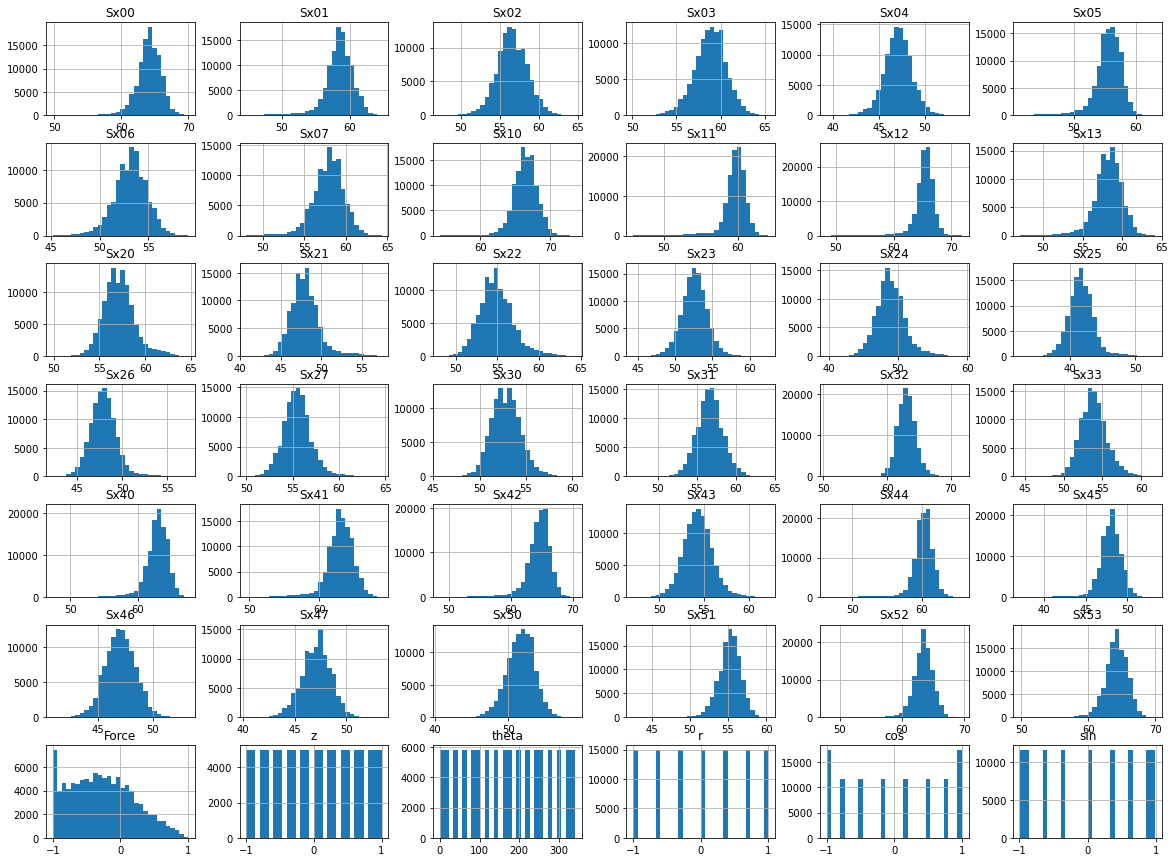

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
SDreal.hist(bins=30, figsize=(20,15))
plt.show()

In [24]:
SDy = SDreal.iloc[:,36:42]
SDy.describe()

,Force,z,theta,r,cos,sin
count,105058.000000,105058.000000,105058.000000,1.050580e+05,105058.000000,105058.000000
mean,-0.269901,-0.000143,170.064155,-2.855565e-05,-0.000313,-0.000213
std,0.459544,0.605575,103.745544,6.666246e-01,0.707064,0.707156
min,-1.000000,-1.000000,0.000000,-1.000000e+00,-1.000000,-0.984808
25%,-0.646486,-0.500000,80.000000,-6.666667e-01,-0.766044,-0.642788
50%,-0.295627,0.000000,180.000000,2.220446e-16,-0.173648,0.000000
75%,0.060811,0.500000,260.000000,6.666667e-01,0.766044,0.642788
max,1.000000,1.000000,340.000000,1.000000e+00,1.000000,0.984808


In [25]:
X = SDreal.iloc[:,0:36]
y = SDreal.iloc[:,[36,37,40,41]]

In [26]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx42,Sx43,Sx44,Sx45,Sx46,Sx47,Sx50,Sx51,Sx52,Sx53
0,67.3,60.5,60.0,59.6,46.2,54.2,54.4,59.7,65.2,60.9,...,65.5,54.1,58.8,48.6,48.3,48.1,54.8,54.8,65.0,67.4
1,67.4,60.8,60.0,60.1,46.3,54.5,54.6,59.8,65.3,61.4,...,64.8,55.3,58.5,48.7,48.6,48.1,55.8,53.7,65.5,67.2
2,67.2,60.3,60.3,60.1,46.3,54.9,55.4,60.0,64.9,61.2,...,65.0,55.6,57.9,48.9,48.6,47.9,56.5,53.1,65.8,67.0
3,67.0,59.9,60.4,60.4,46.6,54.9,55.1,60.2,65.6,61.2,...,64.8,55.8,58.1,49.1,48.5,47.4,56.4,52.7,66.1,67.0
4,67.0,59.9,60.5,60.5,46.6,54.6,55.1,60.3,65.5,60.8,...,64.5,55.8,58.4,49.1,48.1,46.7,56.2,53.1,66.4,67.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105063,64.3,57.9,56.6,59.9,46.1,51.9,51.7,54.8,65.8,61.8,...,66.2,56.5,58.8,47.0,47.3,48.8,52.6,56.0,63.2,63.1
105064,63.1,57.4,56.5,59.9,46.2,52.6,51.9,55.1,65.4,62.4,...,66.2,56.4,59.2,46.8,47.4,48.5,52.8,55.5,62.8,63.4
105065,63.4,57.2,56.5,59.7,46.2,52.3,50.9,55.1,65.0,62.5,...,66.3,56.7,58.6,47.3,47.4,48.3,52.7,55.6,62.4,63.3
105066,63.3,57.3,55.8,59.8,46.0,52.4,51.6,54.9,65.0,62.6,...,66.4,56.7,58.9,47.4,47.0,48.9,52.9,55.8,62.5,63.1


In [27]:
y

,Force,z,cos,sin
0,-0.954398,-1.0,1.000000,0.00000
1,-0.953612,-1.0,1.000000,0.00000
2,-0.952334,-1.0,1.000000,0.00000
3,-0.953612,-1.0,1.000000,0.00000
4,-0.953120,-1.0,1.000000,0.00000
...,...,...,...,...
105063,-0.747224,1.0,0.939693,-0.34202
105064,-0.747813,1.0,0.939693,-0.34202
105065,-0.746830,1.0,0.939693,-0.34202
105066,-0.747912,1.0,0.939693,-0.34202


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [29]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  83205 ea 79 %    X_valid:  20802 ea 19 %    X_test:  1051 ea 1 %


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/231101_1746_2kPa_9V_3line_Data_B9_SS.pkl']

In [32]:
from tensorflow import keras
model = keras.models.Sequential([  
    keras.layers.Dense(512, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),            
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                           
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                           
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                           
    keras.layers.Dense(4)
    
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               18944     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 89,924
Trainable params: 89,924
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [33]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [34]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [35]:
dataname

'231101_1746_2kPa_9V_3line_Data_B9'

In [36]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 8
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
2601/2601 [==============================] - 5s 2ms/step - loss: 0.1261 - val_loss: 0.0870
Epoch 2/300
2601/2601 [==============================] - 4s 2ms/step - loss: 0.0636 - val_loss: 0.0632
Epoch 3/300
2601/2601 [==============================] - 4s 1ms/step - loss: 0.0492 - val_loss: 0.0525
Epoch 4/300
2601/2601 [==============================] - 4s 1ms/step - loss: 0.0417 - val_loss: 0.0490
Epoch 5/300
2601/2601 [==============================] - 4s 2ms/step - loss: 0.0366 - val_loss: 0.0513
Epoch 6/300
2601/2601 [==============================] - 4s 2ms/step - loss: 0.0330 - val_loss: 0.0419
Epoch 7/300
2601/2601 [==============================] - 4s 1ms/step - loss: 0.0306 - val_loss: 0.0377
Epoch 8/300
2601/2601 [==============================] - 4s 1ms/step - loss: 0.0288 - val_loss: 0.0321
Epoch 9/300
2601/2601 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0479
Epoch 10/300
2601/2601 [==============================] - 4s 2ms/step - l

In [37]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [38]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [39]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df

651/651 [==============================] - 1s 755us/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
0,-0.556134,-0.745983,-0.031968,-0.938009,-0.510844
1,0.259168,0.068937,0.337704,0.971046,0.393465
2,-0.787110,0.844068,0.125163,-0.791248,-0.450062
3,0.418742,0.268093,-0.252255,1.017148,0.577380
4,-0.081037,-0.755857,1.031486,0.338771,0.101010
...,...,...,...,...,...
20797,-0.456809,0.056385,0.744662,-0.470291,-0.179302
20798,0.192670,-0.152174,-0.114670,-0.630544,-0.557261
20799,-0.311745,0.396304,-0.170714,-0.900493,-0.559637
20800,0.663374,-0.065901,1.051495,0.008464,0.002562


In [40]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df

,force,z,cos,sin,theta
0,-0.406781,-0.7,-0.173648,-0.984808,-0.555556
1,0.702801,0.1,0.173648,0.984808,0.444444
2,-0.613661,0.8,0.500000,-0.866025,-0.333333
3,0.309582,0.2,-0.173648,0.984808,0.555556
4,-0.136216,-0.7,0.939693,0.342020,0.111111
...,...,...,...,...,...
20797,-0.101130,0.0,0.766044,-0.642788,-0.222222
20798,0.344373,0.1,0.173648,-0.984808,-0.444444
20799,-0.270663,0.5,-0.173648,-0.984808,-0.555556
20800,0.687076,0.2,1.000000,0.000000,0.000000


In [41]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)

# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
89.84% force
97.28% z
97.57% cos
97.56% sin
82.90% theta


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
force,0.898356,-0.036662,0.466964,0.20565,0.102437
z,0.030714,0.972836,-0.054415,0.017245,0.017484
cos,0.420845,-0.048087,0.975723,0.028912,0.001814
sin,0.371862,0.01096,0.059408,0.975591,0.762487
theta,0.215678,0.021342,-0.087549,0.756055,0.82899


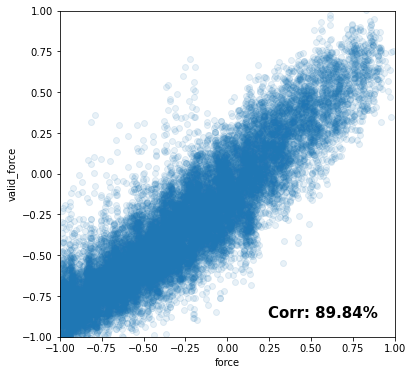

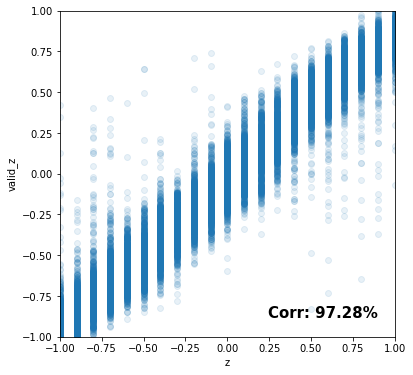

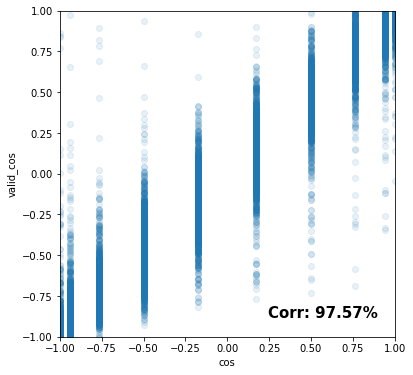

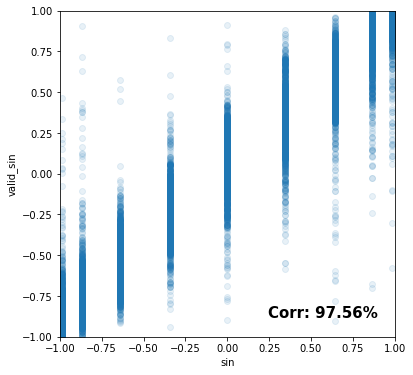

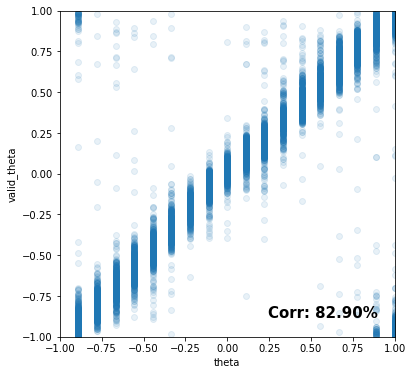

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta']
#fields = ['force','z','r','cos','sin','theta']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


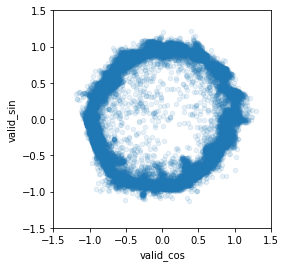

In [43]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

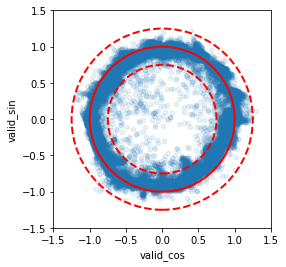

In [44]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# Draw a circle with center at (0, 0) and radius 1
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# Draw offset circles (one inside and one outside the main circle)
offset = 0.25  # adjust the offset value as needed
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


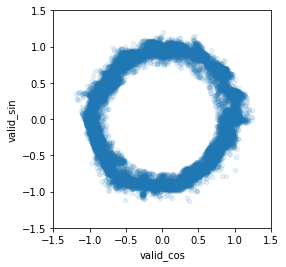

3.667916546485915

In [45]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (1 + offset)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (1 - offset)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

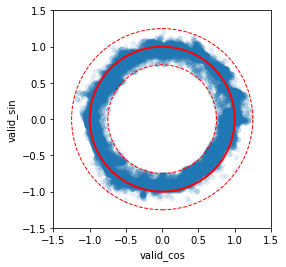

In [46]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# 중심이 (0, 0)이고 반지름이 1인 실선 원을 추가합니다.
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
offset = 0.25  # offset 값을 필요에 따라 조정합니다.
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=1)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()
